In [135]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [136]:
churn_df = pd.read_csv('./Telco_Churn.csv')

In [137]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [138]:
# Check variables types
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Target column "Churn" needs to be converted to binary 1 or 0

TotalCharges variable currently dtype of 'object' and will need to be converted to a float.

Majority of features are categorical variables which will need to be converted to dummy variables.


In [139]:
# Convert Churn column
print(churn_df['Churn'][0:10])
churn_df['Churn'] = [0 if x=='No' else 1 for x in churn_df['Churn']]
print(churn_df['Churn'][0:10])

0     No
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7     No
8    Yes
9     No
Name: Churn, dtype: object
0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64


In [140]:
# Convert total charges variable to numeric, coerce any missing values to Nan
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
print(type(churn_df['TotalCharges'][0]))

<class 'numpy.float64'>


In [141]:
# Convert rest of categorical variables to dummy variables
# Remove customerID col - not used in analysis
churn_df.drop('customerID', axis=1, inplace=True)
dummy_churn = pd.get_dummies(churn_df)

In [142]:
# Check to see if there are any missing values
print(len(dummy_churn))
dummy_churn.isna().sum()

7043


SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [143]:
# There are 11 missing values for TotalCharges - let's remove these
dummy_churn.dropna(inplace=True)
print(len(dummy_churn))
print(dummy_churn.isna().sum())

7032
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
Onlin

# Exploratory Data Analysis
1. Explore correlation of independent variables vs dependent variable
2. Explore demographics of data
3. Explore account information data

## Correlations

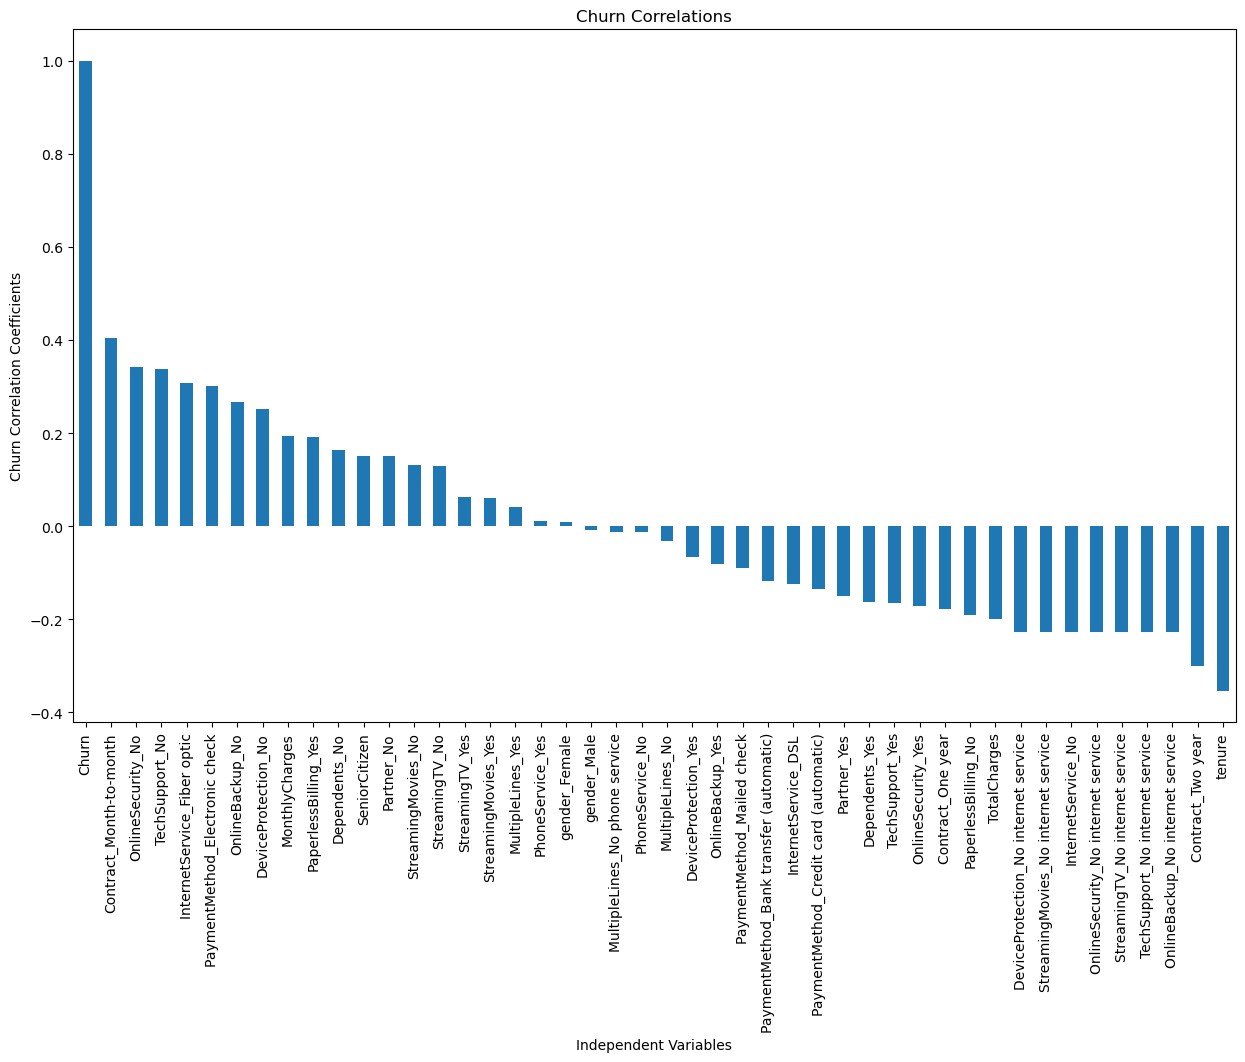

In [144]:
plt.figure(figsize=(15,9))
plt.title('Churn Correlations')
dummy_churn.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Independent Variables')
plt.ylabel('Churn Correlation Coefficients')
plt.show()

Customers with month to month contracts have a high correlation with churn - this is fairly logical as there is it is much easier for them to switch carriers compared to someone stuck in a long term contract. People who are transient, not permanent residents, will also be on month-to-month contracts. 

We also see that people without secondary services (online security, tech support etc.) have a high churn rate. Again, setting all this up takes time and energy so it makes sense that not having these services makes it easier to change.

Interestingly, having fiber optic internet is highly correlated with churn. I'm not sure why this is but fiber optic cable is the fastest form of internet service. cable or DSL tends to be a bit cheaper and easier to install. 

People with partners and dependents are less likely to churn, and the best predictor of whether a person will stay is their tenure and long contract durations. There are typically stiff penalties for breaking your contract so that makes sense. It also makes sense that people who have used your services for a while will not churn as they are likely happy and satisfied customers.



## Customer Demographics

Gender, Age, Partner, Dependent variable analysis

* Male and Female split is relatively even and so are the amount of people with and without partners.

* The majority of data do not have dependents and are not senior citizens. 

* We should keep these distributions in mind as under represented categories (senior citizens and people with dependents) can lead the model to under estimate their impact

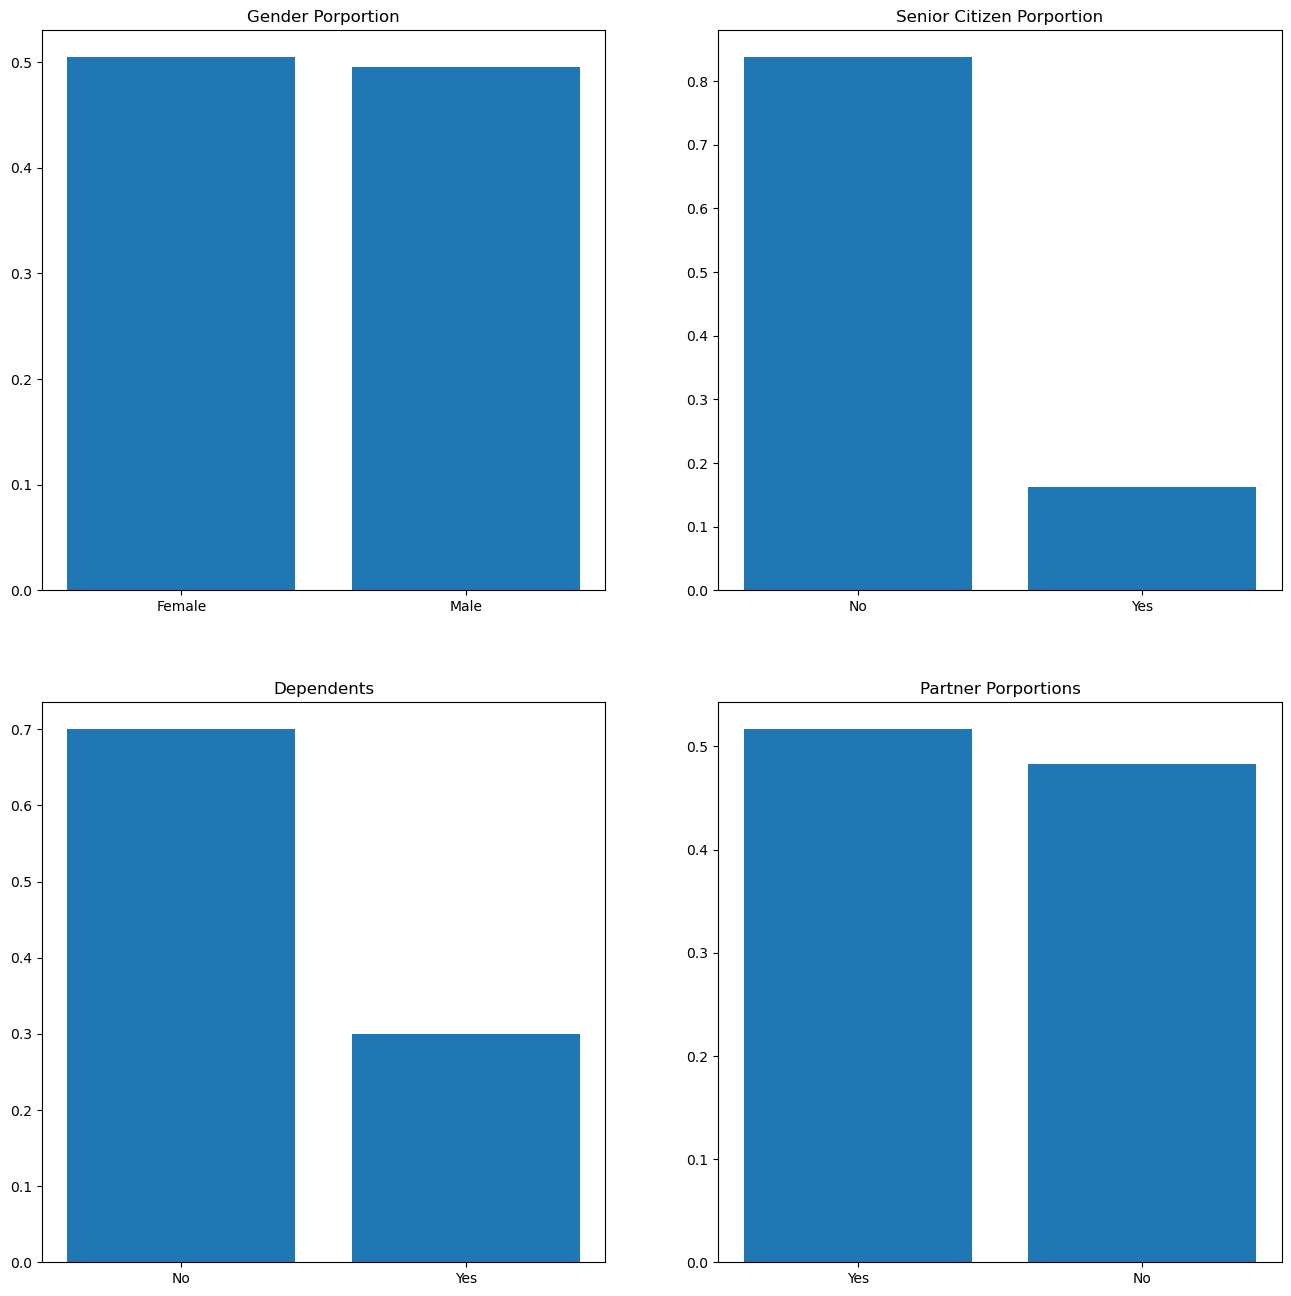

In [145]:
# Gender distribution
figure, axis = plt.subplots(2, 2, figsize=(16,16))
axis[0, 0].bar(churn_df['gender'].unique(),(churn_df['gender'].value_counts()/(len(churn_df))))
axis[0, 0].set_title('Gender Porportion')
axis[0, 1].bar(['No', 'Yes'],(churn_df['SeniorCitizen'].value_counts()/(len(churn_df))))
axis[0, 1].set_title('Senior Citizen Porportion')
axis[1, 0].bar(churn_df['Dependents'].unique(),(churn_df['Dependents'].value_counts()/(len(churn_df))))
axis[1, 0].set_title('Dependents')
axis[1, 1].bar(churn_df['Partner'].unique(),(churn_df['Partner'].value_counts()/(len(churn_df))))
axis[1, 1].set_title('Partner Porportions')
plt.show()

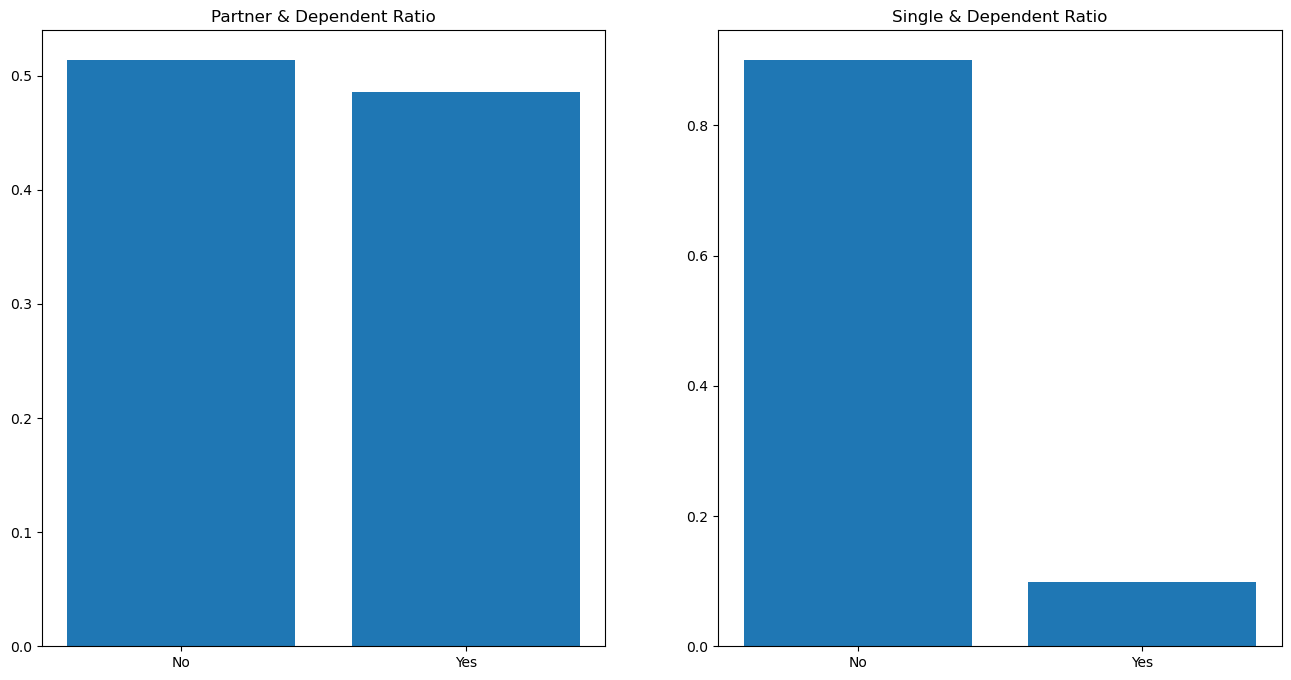

In [146]:
# Let's evaluate whether there are differences between people who have dependents and those who do not

# split data based on partner
partnerdf = churn_df[churn_df['Partner']=='Yes']
singledf = churn_df[churn_df['Partner']=='No']

fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].bar(partnerdf['Dependents'].unique(), (partnerdf['Dependents'].value_counts()/len(partnerdf)))
ax[0].set_title('Partner & Dependent Ratio')
ax[1].bar(singledf['Dependents'].unique(), (singledf['Dependents'].value_counts()/len(singledf)))
ax[1].set_title('Single & Dependent Ratio')
plt.show()

Nearly 50% of people in a relationship have kids while the vast majority of single people do not


## Account Data Analysis

Analysis of tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, and TotalCharges

In [147]:
churn_df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

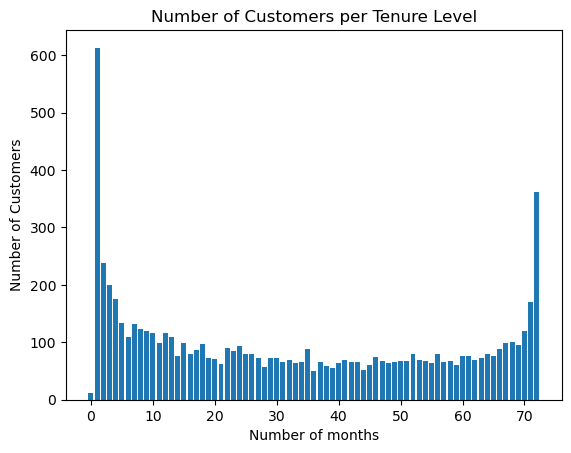

In [148]:
# tenure analysis 

#explore tenure distribution
tenure = churn_df.groupby('tenure').count().rename({'gender':'count'})['gender']
plt.figure()
plt.title('Number of Customers per Tenure Level')
plt.bar(tenure.index.values, tenure)
plt.xlabel('Number of months')
plt.ylabel('Number of Customers')
plt.show()

Customer tenure distribution has two peaks around new customers and the other for long held customers. A very large porpotion of customers are new, within 2 months, and a large portion of efforts should be to retain these customers as they have a higher probability to churn. 


In [149]:
# how fast do customers churn that are under 3 months in tenure compared to customers 
#that have been with the company over 70 months?

lowtenuredf = churn_df[churn_df['tenure']<=3]
hightenuredf = churn_df[churn_df['tenure']>=70]
low_tenured_churn = lowtenuredf['Churn'].sum() / len(lowtenuredf)
high_tenured_churn = hightenuredf['Churn'].sum() / len(hightenuredf)

print('Customers who have been with the company for 3 months or less have a churn rate of: ', low_tenured_churn*100, '%')
print('Customers who have been with the company for 70+ months have a churn rate of: ', high_tenured_churn*100, '%')

Customers who have been with the company for 3 months or less have a churn rate of:  56.21468926553672 %
Customers who have been with the company for 70+ months have a churn rate of:  3.5330261136712746 %


The distribution of customer tenure is scary as a large portion of customers are in a vulnerable high churn group. If the company is not able to continually attract new customers then there will be a substantial loss in revenue if short tenured customers continue to churn at a high rate. Getting the churn rate down for new customers is critical for financial stability and growth. 

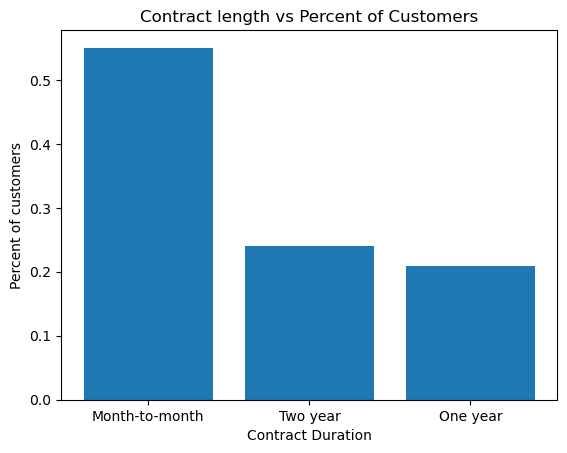

In [150]:
# contract analysis
plt.figure()
plt.bar(churn_df['Contract'].value_counts().index, (churn_df['Contract'].value_counts().values)/len(churn_df['Contract']))
plt.title('Contract length vs Percent of Customers')
plt.xlabel('Contract Duration')
plt.ylabel('Percent of customers')
plt.show()

The distribution of contract types is skewed towards month-to-month contracts, with two year contracts being the second most popular and one year contracts being the least. 

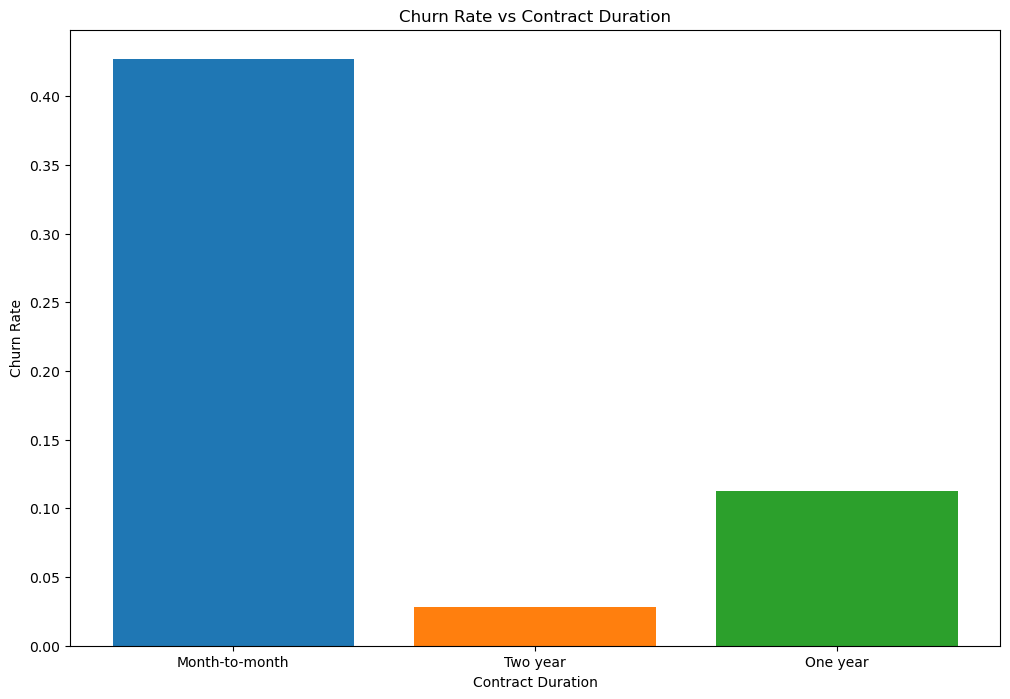

In [151]:
contract_types=['Month-to-month', 'Two year', 'One year']
churn_rates = []
plt.figure(figsize=(12,8))

for contract in contract_types:
    contract_df = churn_df[churn_df['Contract']==contract]
    churn_ratio = contract_df['Churn'].sum()/len(contract_df)
    churn_rates.append(churn_ratio)
    plt.bar(contract, churn_ratio)
    
plt.title('Churn Rate vs Contract Duration')
plt.xlabel('Contract Duration')
plt.ylabel('Churn Rate')

plt.show()

Month-to-month contracts have an incredibly high churn rate of over 40% while two year contracts have a very low churn rate below 5%. Again, more focus should be aimed towards getting people on longer contracts. Perhaps better introductory deals to start converting people to longer contracts is needed. 

In [152]:
# Monthly & Total Charges distributions
print(len(churn_df['MonthlyCharges'].unique()))

1585


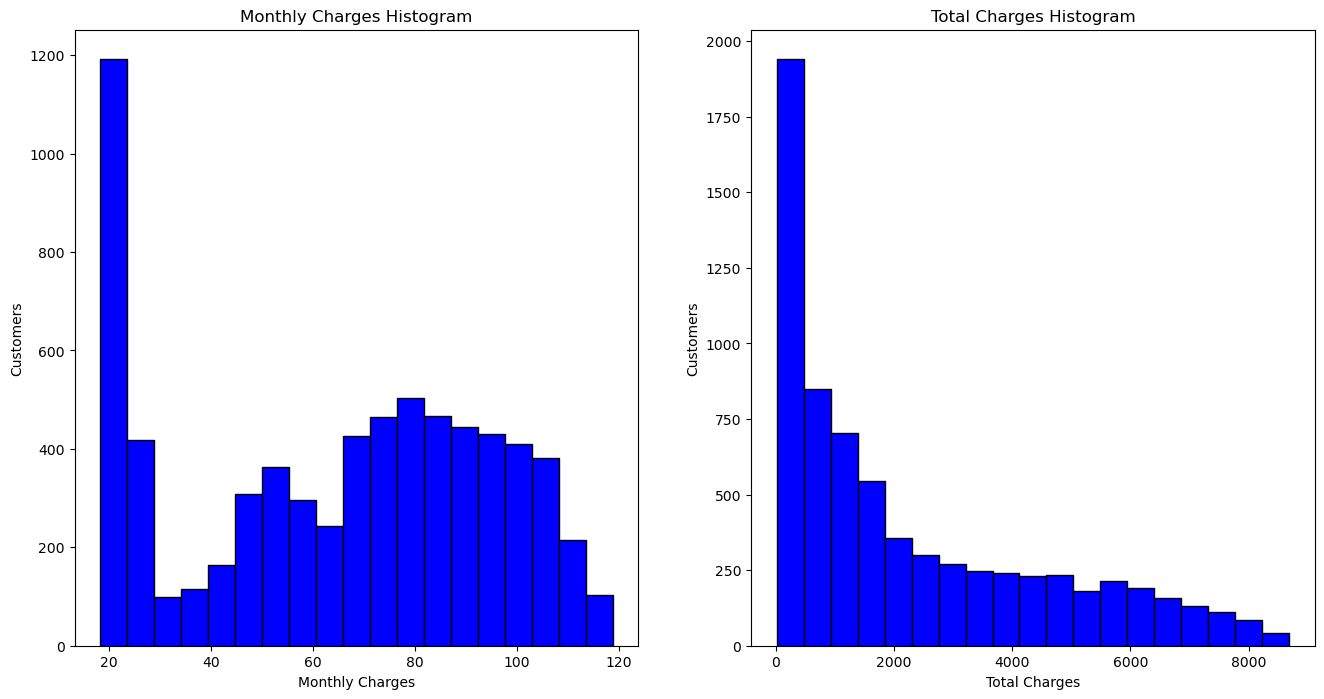

In [153]:
fig, axs = plt.subplots(1,2, figsize=(16,8))

# Draw the plot
axs[0].hist(churn_df['MonthlyCharges'], bins = int(1585/80),
         color = 'blue', edgecolor = 'black')
axs[1].hist(churn_df['TotalCharges'], bins = int(1585/80),
         color = 'blue', edgecolor = 'black')


# Title and labels
axs[0].set_title('Monthly Charges Histogram')
axs[0].set_xlabel('Monthly Charges', size = 10)
axs[0].set_ylabel('Customers', size= 10)

axs[1].set_title('Total Charges Histogram')
axs[1].set_xlabel('Total Charges', size = 10)
axs[1].set_ylabel('Customers', size= 10)


plt.show()

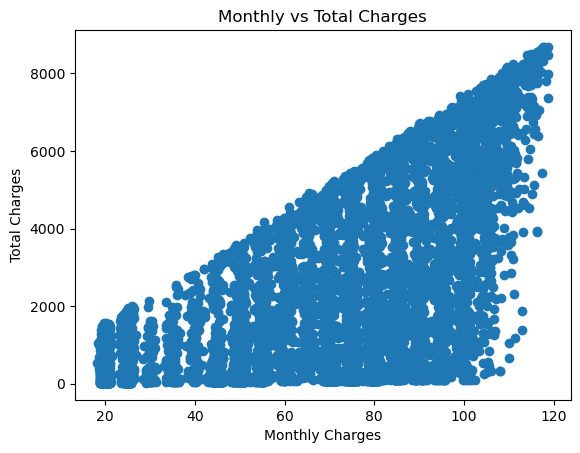

In [154]:
# Monthly vs Total Charges relationship
plt.figure()
plt.title('Monthly vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.scatter(churn_df['MonthlyCharges'], churn_df['TotalCharges'])
plt.show()


There appears to be a strong correlation between monthly charges and total charges. This makes sense as monthly charges directly impacts total charges. This co-linearity should be addressed before building and training models.


In [155]:
from scipy import stats
x = churn_df.dropna()
print('Monthly Charges and Total Charges have a correlation of: ',stats.pearsonr(x['MonthlyCharges'], x['TotalCharges'])[0])

Monthly Charges and Total Charges have a correlation of:  0.6510648032262024


In [156]:
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

    

C:\Users\lmoor\AppData\Local\Temp\ipykernel_54880\3047289394.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, i].set_xticklabels(churn_df[cols[idx]].value_counts().index, rotation=45)
C:\Users\lmoor\AppData\Local\Temp\ipykernel_54880\3047289394.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, i].set_xticklabels(churn_df[cols[idx]].value_counts().index, rotation=45)
C:\Users\lmoor\AppData\Local\Temp\ipykernel_54880\3047289394.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, i].set_xticklabels(churn_df[cols[idx]].value_counts().index, rotation=45)
C:\Users\lmoor\AppData\Local\Temp\ipykernel_54880\3047289394.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[row, i].set_xticklabels(churn_df[cols[idx]].value_counts().index, rotation=45)
C:\Users\lmoor\AppData\Local\Temp\ipykernel_54880\3047289394.py:8: UserWarning: FixedFormatt

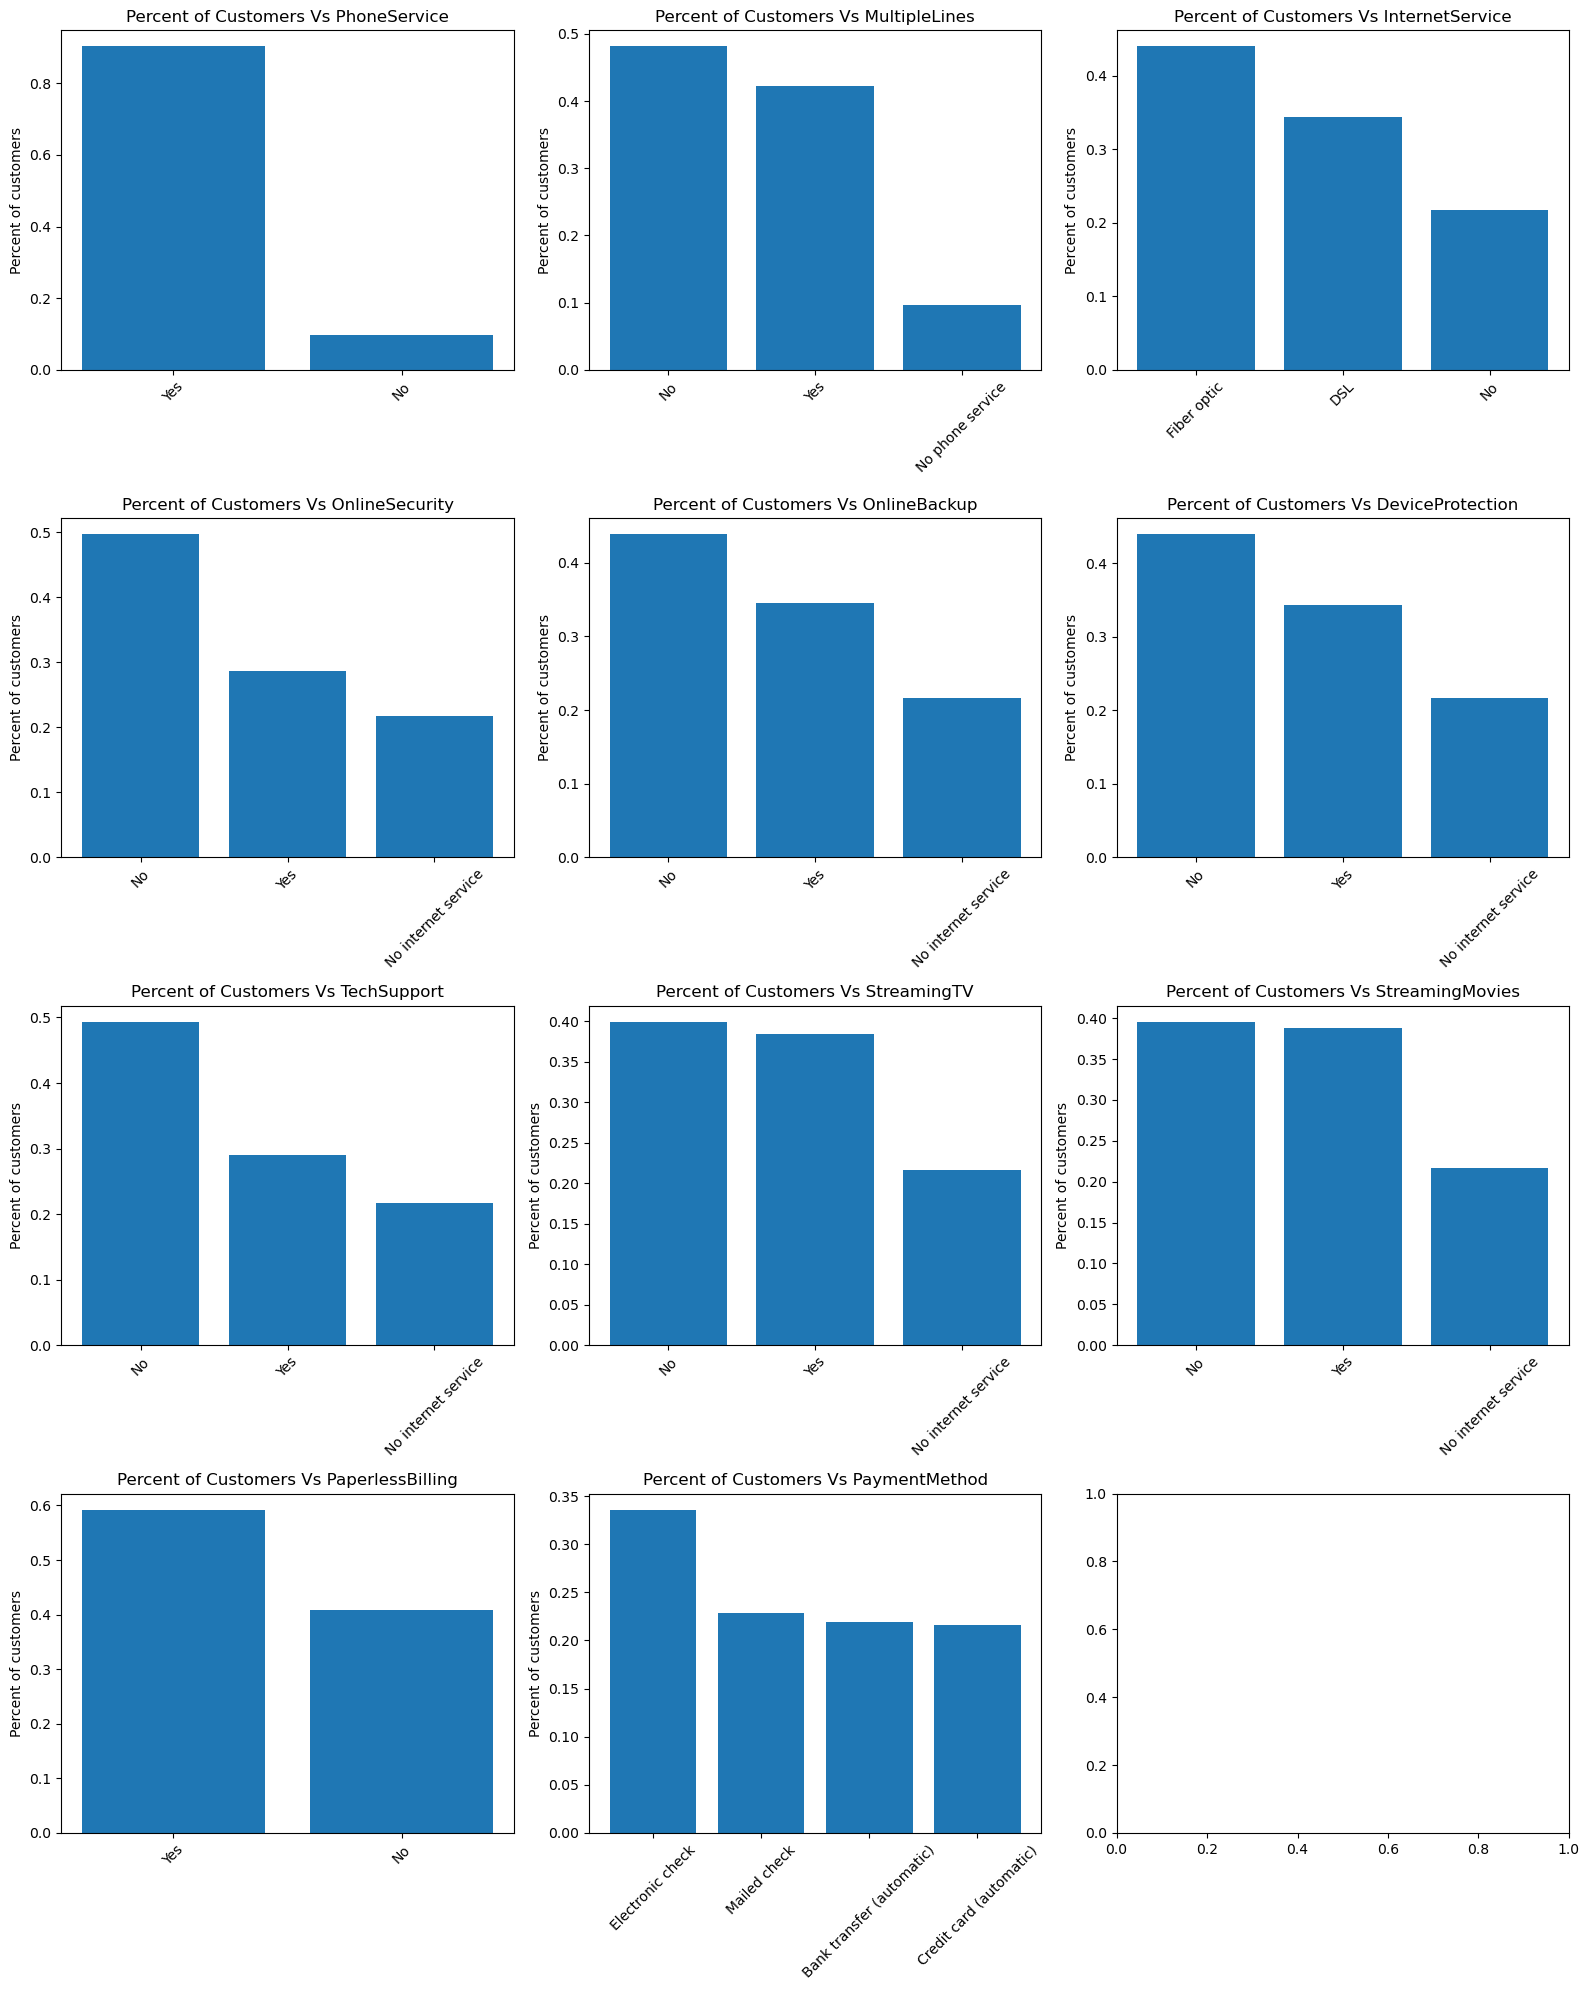

In [157]:
fig, axs = plt.subplots(4, 3, figsize=(16,20))
idx = 0
for row in range(4):
    
    for i in range(3):
        
        axs[row, i].bar(churn_df[cols[idx]].value_counts().index, churn_df[cols[idx]].value_counts()/len(churn_df[cols[idx]]))
        axs[row, i].set_xticklabels(churn_df[cols[idx]].value_counts().index, rotation=45)
        axs[row, i].set_title('Percent of Customers Vs ' + cols[idx])
        axs[row, i].set_ylabel('Percent of customers')
        idx += 1
        if idx > 10:
            break
plt.tight_layout()
plt.show()

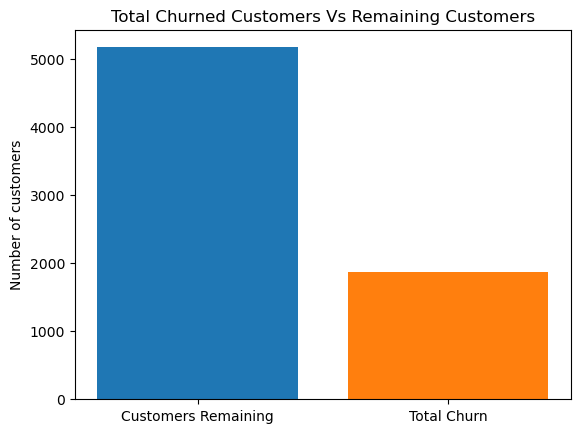

There were 1869 customers who churned, representing 0.2653698707936959 percent of customers
There were 5174 customers who did not churn, representing 0.7346301292063041 percent of customers


In [158]:
# Finally let's take a quick look at the churn variable
plt.figure()
plt.bar(['Customers Remaining'], len(churn_df[churn_df['Churn']==0]))
plt.bar(['Total Churn'], churn_df['Churn'].sum())
plt.title('Total Churned Customers Vs Remaining Customers')
plt.ylabel('Number of customers')
plt.show()

print('There were {} customers who churned, representing {} percent of customers'.format( churn_df['Churn'].sum(), 
                                                                                        churn_df['Churn'].sum()/len(churn_df)))


print('There were {} customers who did not churn, representing {} percent of customers'.format( len(churn_df[churn_df['Churn']==0]), 
                                                                                        len(churn_df[churn_df['Churn']==0])/len(churn_df)))

There are 2.77 times more customers who did not churn than customers that churned. Again, this class imbalance may impact our model's accuracy as it puts less weight on the undersampled class' data. This will lead to predictions being more heavily weighted towards the negative class. Upsampling is one method to combat the class imbalance if it is severely impacting model performance.

# Modelling
1. logistic regression
2. random forest
3. Feed forward neural network

## Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [166]:
# split out target and features
y = dummy_churn['Churn']
X = dummy_churn.drop('Churn', axis=1)
print(y.head())
print(X.columns)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [169]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

5274 5274 1758 1758


In [174]:
cls = LogisticRegression(max_iter=1000)
cls.fit(X_train, y_train)


0.8024270003792188


TRAIN PERFORMANCE METRICS
Logistic train accuracy of:  0.8024270003792188
Logistic train precision of:  0.6522462562396006
Logistic train recall of:  0.5568181818181818
Logistic train roc auc score of:  0.7243480459013308


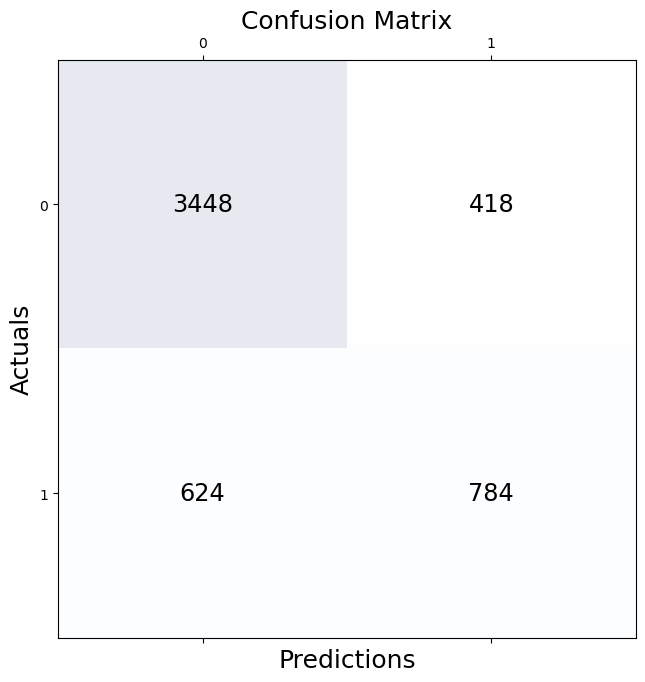

1408


In [190]:
print('TRAIN PERFORMANCE METRICS')
print('Logistic train accuracy of: ', accuracy_score(y_train, cls.predict(X_train)))
print('Logistic train precision of: ', precision_score(y_train, cls.predict(X_train)))
print('Logistic train recall of: ', recall_score(y_train, cls.predict(X_train)))
print('Logistic train roc auc score of: ', roc_auc_score(y_train, cls.predict(X_train)))
conf_matrix = confusion_matrix(y_train, cls.predict(X_train))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax = plt.gca()
plt.show()

print(y_train.sum())

TEST PERFORMANCE METRICS
Logistic test accuracy of:  0.8071672354948806
Logistic test precision of:  0.6480582524271845
Logistic test recall of:  0.579175704989154
Logistic train roc auc score of:  0.7336896258176302


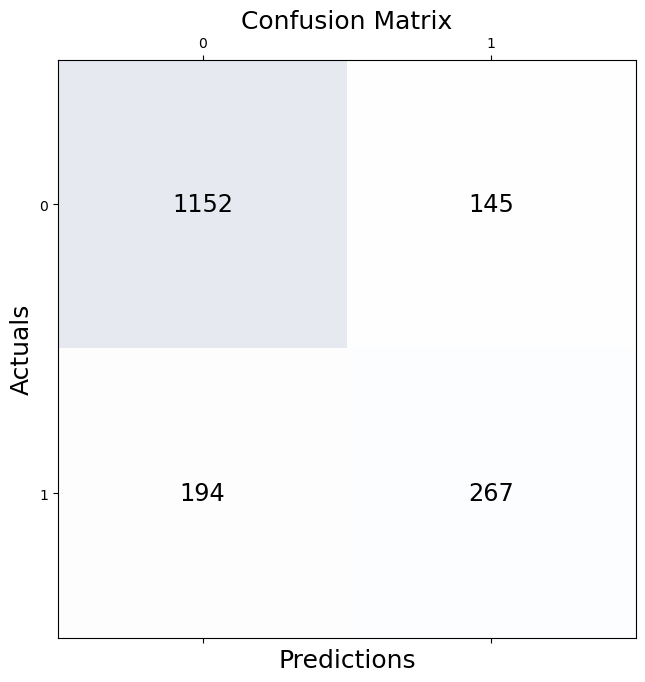

In [193]:
print('TEST PERFORMANCE METRICS')
print('Logistic test accuracy of: ', accuracy_score(y_test, cls.predict(X_test)))
print('Logistic test precision of: ', precision_score(y_test, cls.predict(X_test)))
print('Logistic test recall of: ', recall_score(y_test, cls.predict(X_test)))
print('Logistic test roc auc score of: ', roc_auc_score(y_test, cls.predict(X_test)))
conf_matrix = confusion_matrix(y_test, cls.predict(X_test))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax = plt.gca()
plt.show()

The model seems to be performing fairly well with an accuracy of 80%. However, the model is doing much better at classifying the negative class with a true negative rate of 85.5%, while the true positive rate is only 64.8% and the recall is 58%. This is likely due to the class imbalance in the target variable mentioned before, and we can try and solve this through upsampling.

## Logistic Regression with Upsampling

In [302]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)

TRAIN PERFORMANCE METRICS
Logistic train accuracy of:  0.7459233978005309
Logistic train precision of:  0.5155535224153706
Logistic train recall of:  0.8004261363636364
Logistic train roc auc score of:  0.7632497986525889


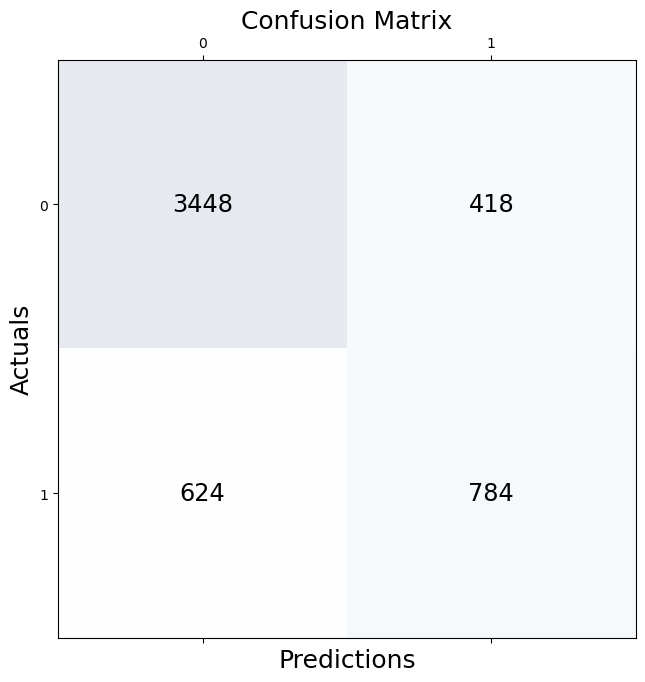

In [303]:
print('TRAIN PERFORMANCE METRICS')
print('Logistic train accuracy of: ', accuracy_score(y_train, clf.predict(X_train)))
print('Logistic train precision of: ', precision_score(y_train, clf.predict(X_train)))
print('Logistic train recall of: ', recall_score(y_train, clf.predict(X_train)))
print('Logistic train roc auc score of: ', roc_auc_score(y_train, clf.predict(X_train)))
conf_matrix = confusion_matrix(y_train, cls.predict(X_train))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, alpha=0.1)
for i in range(confusion_matrix(y_test, y_pred).shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax = plt.gca()
plt.show()

TEST PERFORMANCE METRICS
Logistic test accuracy of:  0.7491467576791809
Logistic test precision of:  0.5131926121372031
Logistic test recall of:  0.8438177874186551
Logistic train roc auc score of:  0.7796575444417871


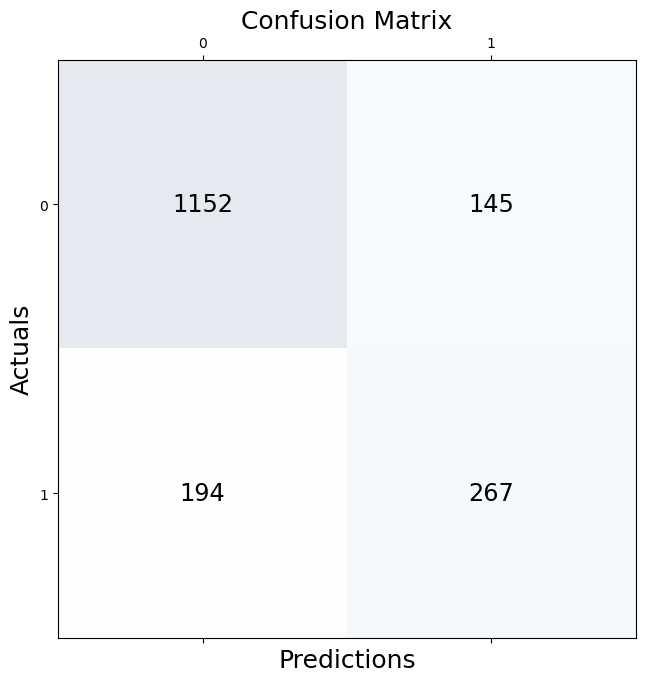

In [304]:
print('TEST PERFORMANCE METRICS')
print('Logistic test accuracy of: ', accuracy_score(y_test, clf.predict(X_test)))
print('Logistic test precision of: ', precision_score(y_test, clf.predict(X_test)))
print('Logistic test recall of: ', recall_score(y_test, clf.predict(X_test)))
print('Logistic train roc auc score of: ', roc_auc_score(y_test, clf.predict(X_test)))
conf_matrix = confusion_matrix(y_test, cls.predict(X_test))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, alpha=0.1)
for i in range(confusion_matrix(y_test, y_pred).shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax = plt.gca()
plt.show()

After upsampling we can see that the model is doing much better at identifying the positive class with a recall rate of 84%. However, we can also see that the precision has dropped off substantially to 51% meaning that from all the predicted positive results, only about half will actually churn. Despite the overall accuracy dropping, we need to keep on eye on the auc_roc_score which represents the model's ability to distinguish between positive and negative classes. Since this value is higher with upsampling, we should prefer to use the second model over the first. Given the current business scenario, it is much better to optimize for recall as we want to identify all customers with a high likelihood of churning and focus efforts to retain them. 

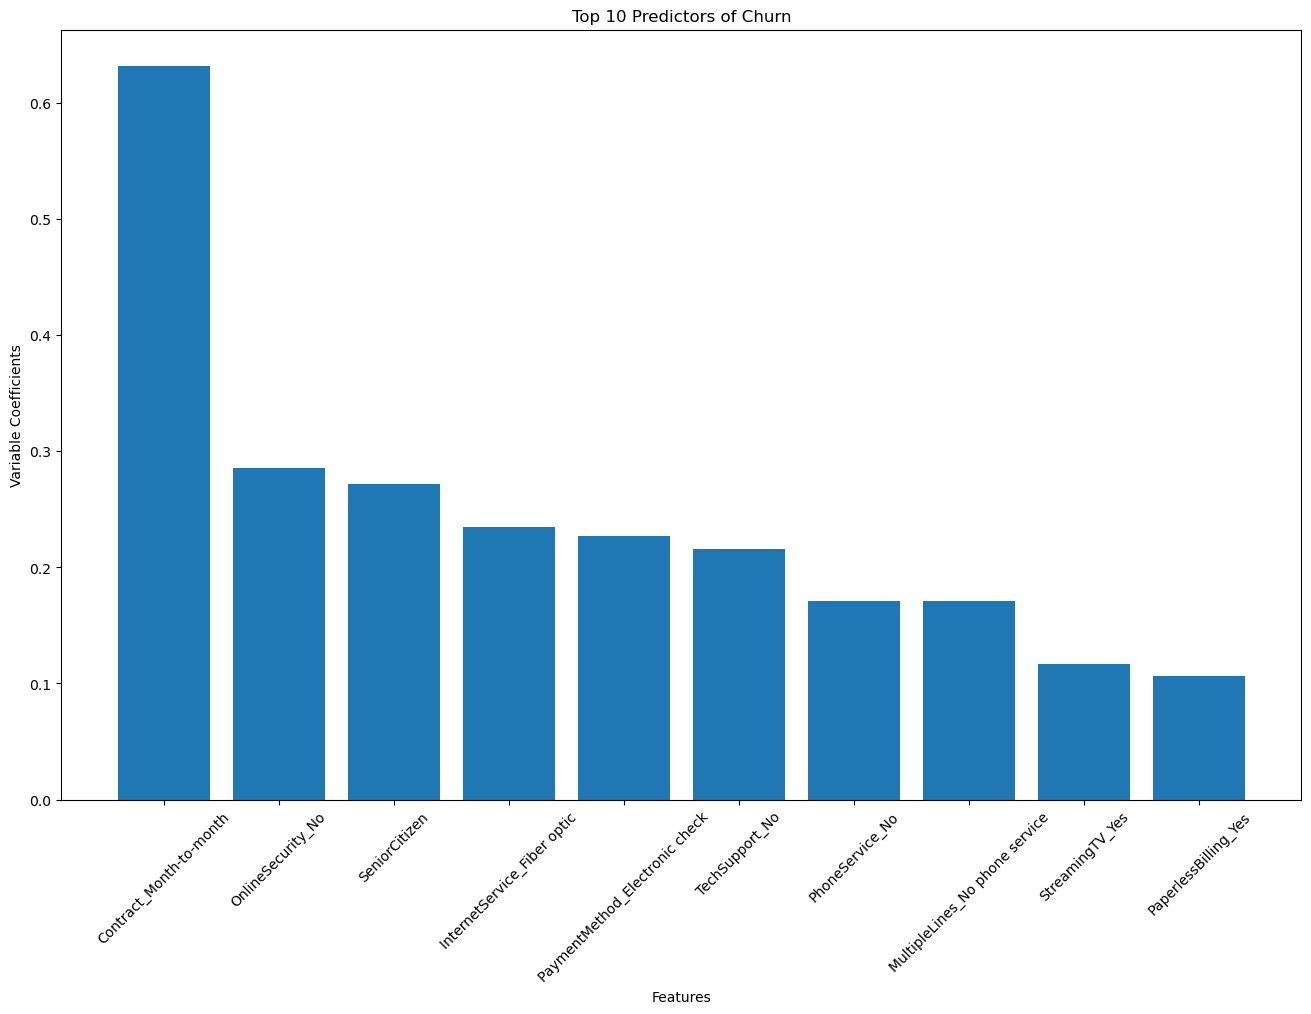

In [315]:
coef = clf.coef_
variables = X_train.columns.values
coef_df = pd.DataFrame({'variable':variables, 'coef':coef[0]})
coef_df = coef_df.sort_values('coef', ascending=False)
plt.figure(figsize=(16,10))
plt.bar(coef_df['variable'][0:10], coef_df['coef'][0:10])
plt.title('Top 10 Predictors of Churn')
plt.xlabel('Features')
plt.ylabel('Variable Coefficients')
plt.xticks(rotation=45)
plt.show()

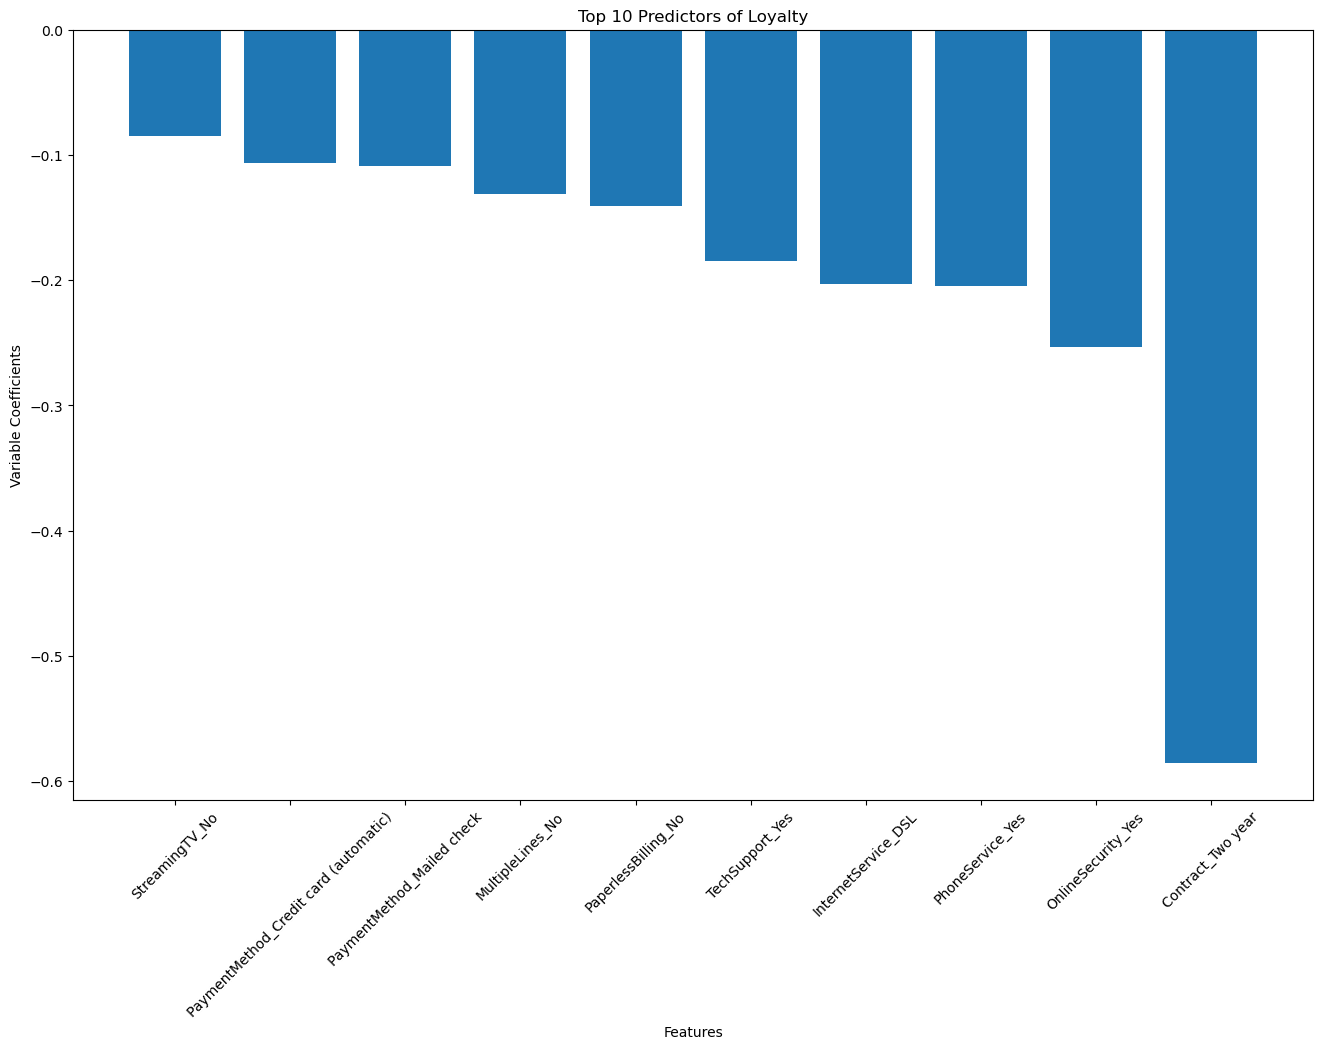

In [317]:
plt.figure(figsize=(16,10))
plt.bar(coef_df['variable'][-10:], coef_df['coef'][-10:])
plt.title('Top 10 Predictors of Loyalty')
plt.xlabel('Features')
plt.ylabel('Variable Coefficients')
plt.xticks(rotation=45)
plt.show()

Here we can see that two year contracts, online security, and whether the customer has phone service are all negatively correlated with churn. Getting customers on long term contracts is the best way to reduce churn. In a similar vein, short term month to month contracts are the largest predictor of churn. So the focus should be to get customers off short term contracts and on to longer ones.

## Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=1)

TRAIN PERFORMANCE METRICS
Decision Tree train accuracy of:  0.782707622298066
Decision Tree train precision of:  0.7168874172185431
Decision Tree train recall of:  0.3075284090909091
Decision Tree train roc auc score of:  0.6316483224968256


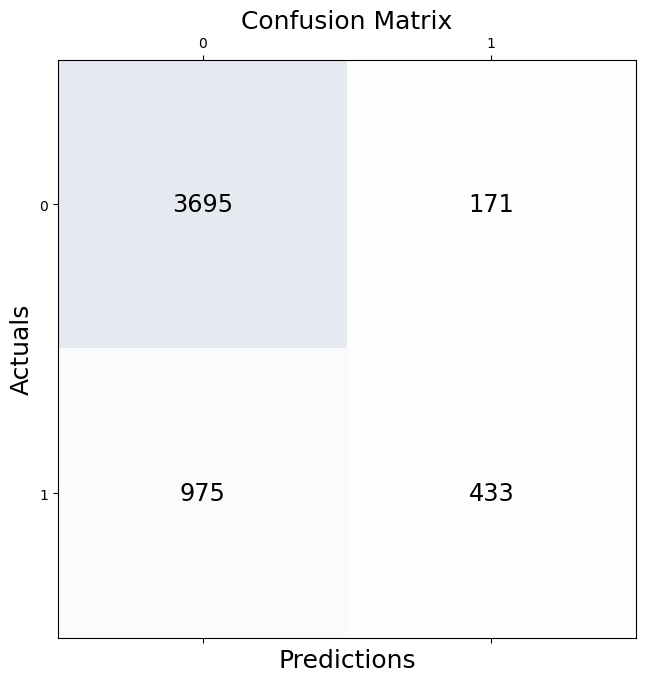

1408
5274 1408 1758 1758


In [251]:
print('TRAIN PERFORMANCE METRICS')
print('Decision Tree train accuracy of: ', accuracy_score(y_train, clf.predict(X_train)))
print('Decision Tree train precision of: ', precision_score(y_train, clf.predict(X_train)))
print('Decision Tree train recall of: ', recall_score(y_train, clf.predict(X_train)))
print('Decision Tree train roc auc score of: ', roc_auc_score(y_train, clf.predict(X_train)))
conf_matrix = confusion_matrix(y_train, clf.predict(X_train))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax = plt.gca()
plt.show()

print(y_train.sum())
print(len(X_train), y_train.sum(), len(X_test), len(y_test))


TEST PERFORMANCE METRICS
Decision Tree test accuracy of:  0.7969283276450512
Decision Tree test precision of:  0.7524271844660194
Decision Tree test recall of:  0.3362255965292842
Decision Tree test roc auc score of:  0.6484520426748195


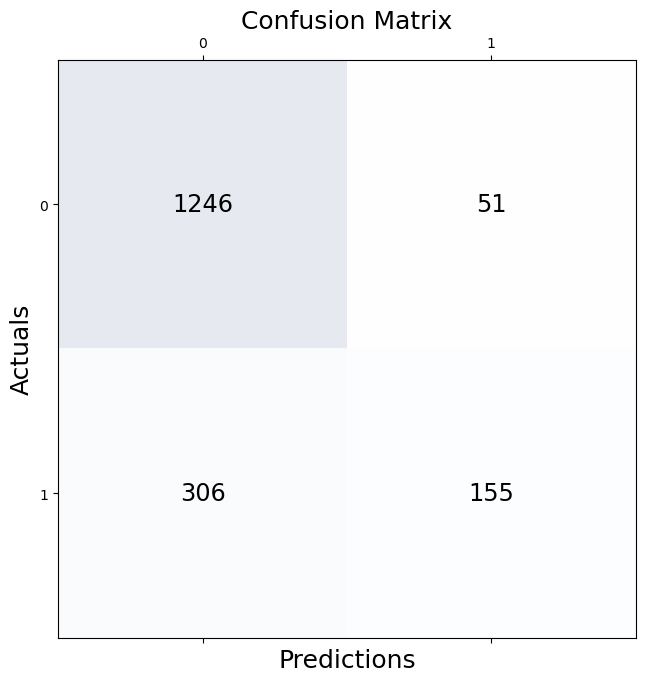

In [252]:
print('TEST PERFORMANCE METRICS')
print('Decision Tree test accuracy of: ', accuracy_score(y_test, clf.predict(X_test)))
print('Decision Tree test precision of: ', precision_score(y_test, clf.predict(X_test)))
print('Decision Tree test recall of: ', recall_score(y_test, clf.predict(X_test)))
print('Decision Tree test roc auc score of: ', roc_auc_score(y_test, clf.predict(X_test)))
conf_matrix = confusion_matrix(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.1)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
ax = plt.gca()
plt.show()


Model performance is slightly worse than the logistic regression, but this could be improved by fine-tuning the parameters. For now, the RandomForest has an accuracy score of ~80% but with a far worse auc roc score. Most important features are listed below.

<AxesSubplot:>

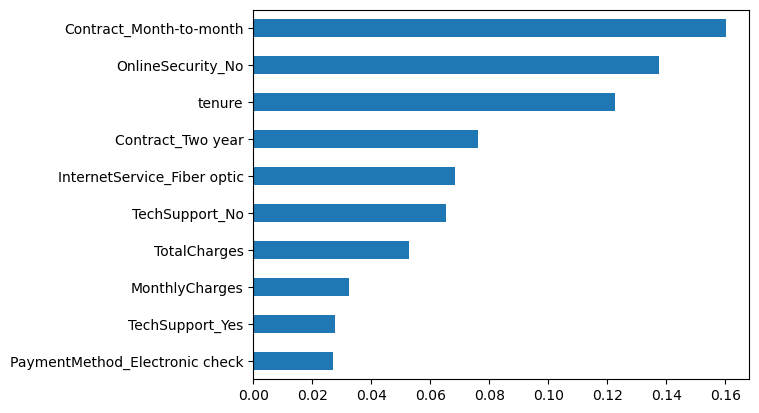

In [253]:
importances = clf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [259]:
import tensorflow as df
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [285]:
y = dummy_churn['Churn']
X = dummy_churn.drop('Churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [286]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train_scaled.shape, type(X_train_scaled))
print(X_test_scaled.shape, type(X_test_scaled))
print(y_train.shape, type(y_train))

(5274, 45) <class 'numpy.ndarray'>
(1758, 45) <class 'numpy.ndarray'>
(5274,) <class 'numpy.ndarray'>


pandas.core.series.Series

In [287]:
model = Sequential([
    Dense(units=16, input_shape=(45,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [268]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                736       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [288]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [291]:
model.fit(x=X_train_scaled, y=y_train, validation_split=0.1, batch_size=10, epochs=100, shuffle=False, verbose=2)

Epoch 1/100
475/475 - 0s - loss: 0.3903 - accuracy: 0.8144 - val_loss: 0.4334 - val_accuracy: 0.7879 - 430ms/epoch - 905us/step
Epoch 2/100
475/475 - 0s - loss: 0.3902 - accuracy: 0.8146 - val_loss: 0.4334 - val_accuracy: 0.7879 - 390ms/epoch - 822us/step
Epoch 3/100
475/475 - 0s - loss: 0.3901 - accuracy: 0.8150 - val_loss: 0.4335 - val_accuracy: 0.7879 - 384ms/epoch - 807us/step
Epoch 4/100
475/475 - 0s - loss: 0.3900 - accuracy: 0.8150 - val_loss: 0.4336 - val_accuracy: 0.7879 - 376ms/epoch - 792us/step
Epoch 5/100
475/475 - 0s - loss: 0.3899 - accuracy: 0.8152 - val_loss: 0.4336 - val_accuracy: 0.7879 - 411ms/epoch - 864us/step
Epoch 6/100
475/475 - 0s - loss: 0.3898 - accuracy: 0.8152 - val_loss: 0.4338 - val_accuracy: 0.7860 - 397ms/epoch - 835us/step
Epoch 7/100
475/475 - 1s - loss: 0.3897 - accuracy: 0.8152 - val_loss: 0.4339 - val_accuracy: 0.7860 - 551ms/epoch - 1ms/step
Epoch 8/100
475/475 - 0s - loss: 0.3895 - accuracy: 0.8148 - val_loss: 0.4340 - val_accuracy: 0.7879 - 378

Epoch 65/100
475/475 - 1s - loss: 0.3833 - accuracy: 0.8188 - val_loss: 0.4394 - val_accuracy: 0.7841 - 564ms/epoch - 1ms/step
Epoch 66/100
475/475 - 0s - loss: 0.3832 - accuracy: 0.8188 - val_loss: 0.4393 - val_accuracy: 0.7841 - 479ms/epoch - 1ms/step
Epoch 67/100
475/475 - 1s - loss: 0.3831 - accuracy: 0.8188 - val_loss: 0.4394 - val_accuracy: 0.7841 - 502ms/epoch - 1ms/step
Epoch 68/100
475/475 - 0s - loss: 0.3830 - accuracy: 0.8184 - val_loss: 0.4395 - val_accuracy: 0.7841 - 450ms/epoch - 947us/step
Epoch 69/100
475/475 - 1s - loss: 0.3829 - accuracy: 0.8186 - val_loss: 0.4398 - val_accuracy: 0.7841 - 511ms/epoch - 1ms/step
Epoch 70/100
475/475 - 0s - loss: 0.3828 - accuracy: 0.8186 - val_loss: 0.4397 - val_accuracy: 0.7841 - 489ms/epoch - 1ms/step
Epoch 71/100
475/475 - 1s - loss: 0.3827 - accuracy: 0.8186 - val_loss: 0.4398 - val_accuracy: 0.7841 - 512ms/epoch - 1ms/step
Epoch 72/100
475/475 - 0s - loss: 0.3825 - accuracy: 0.8190 - val_loss: 0.4400 - val_accuracy: 0.7841 - 495ms

In [301]:
pred = model.predict(X_test_scaled)
pred = [1 if x >=0.5 else 0 for x in pred]
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(roc_auc_score(y_test, pred))

55/55 [==============================] - 0s 1ms/step
0.7969283276450512
0.6405405405405405
0.5140997830802603
0.7057777250019651


The final method used is a simple feed forward neural network. The layers and units have been set rather arbitrarily and the model could definitely be further fine tuned for better performance. However, this basic neural network does not perform any better than the logistic regression. It has a test set accuracy of around 80%, precision of 64%, recall of 51% and auc_roc score of 70%. 

Given the logistic's performance it seems to be the winner for now :)

Logistic test accuracy of:  0.8071672354948806

Logistic test precision of:  0.6480582524271845

Logistic test recall of:  0.579175704989154

Logistic train roc auc score of:  0.7336896258176302
